# Hack The Crisis Sweden
## Data Handling and analysis
### Richard Wang


In [1]:
import pandas as pd
import numpy as np

In [22]:
dfind = pd.read_excel('./000002YB.xlsx', skiprows=2)
dfind.columns = ['Industry Classification', 'Company size', '2018', '2019']
dfind = dfind.fillna(method = 'ffill')
dfind

,Industry Classification,Company size,2018,2019
0,01 agricultural establishments and establishme...,1-4 employees,6585.0,6445.0
1,01 agricultural establishments and establishme...,5-9 employees,874.0,890.0
2,01 agricultural establishments and establishme...,10-19 employees,253.0,252.0
3,01 agricultural establishments and establishme...,20-49 employees,86.0,90.0
4,01 agricultural establishments and establishme...,50-99 employees,23.0,23.0
...,...,...,...,...
647,Database:,200-499 employees,0.0,0.0
648,Statistical database,200-499 employees,0.0,0.0
649,Statistical database,200-499 employees,0.0,0.0
650,Internal reference code:,200-499 employees,0.0,0.0


In [95]:
terms = ['bar', 'restaurants', 'delivery', 'retail', 'care', 'transport']
dfind1 = dfind[dfind["Industry Classification"].str.contains('|'.join(terms),na =False)]
dfind1 = dfind1.groupby(['Industry Classification', 'Company size']).agg({'2019':'sum'})
dfind1 = dfind1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dfind1.columns = ['Industry Classification', 'Company size', '2019_norm']
dfind2 = dfind[dfind["Industry Classification"].str.contains('|'.join(terms),na =False)]
dfind2 = pd.merge(dfind2, dfind1, how='left', on =['Industry Classification', 'Company size'])
dfind2

,Industry Classification,Company size,2018,2019,2019_norm
0,30 industry for other transport equipment,1-4 employees,213.0,218.0,64.306785
1,30 industry for other transport equipment,5-9 employees,48.0,40.0,11.799410
2,30 industry for other transport equipment,10-19 employees,28.0,32.0,9.439528
3,30 industry for other transport equipment,20-49 employees,30.0,30.0,8.849558
4,30 industry for other transport equipment,50-99 employees,11.0,11.0,3.244838
5,30 industry for other transport equipment,100-199 employees,6.0,7.0,2.064897
6,30 industry for other transport equipment,200-499 employees,1.0,1.0,0.294985
7,"47 retail trade, except of motor vehicles and ...",1-4 employees,14928.0,14837.0,67.257480
8,"47 retail trade, except of motor vehicles and ...",5-9 employees,4062.0,3977.0,18.028105
9,"47 retail trade, except of motor vehicles and ...",10-19 employees,1907.0,1841.0,8.345422


In [96]:
dfind_rest = dfind2[dfind2["Industry Classification"]== '56 restaurants, catering establishments, bars']
dfind_rest

,Industry Classification,Company size,2018,2019,2019_norm
28,"56 restaurants, catering establishments, bars",1-4 employees,10744.0,11009.0,61.287090
29,"56 restaurants, catering establishments, bars",5-9 employees,4013.0,4171.0,23.219952
30,"56 restaurants, catering establishments, bars",10-19 employees,2020.0,1986.0,11.056060
31,"56 restaurants, catering establishments, bars",20-49 employees,664.0,672.0,3.741023
32,"56 restaurants, catering establishments, bars",50-99 employees,86.0,75.0,0.417525
33,"56 restaurants, catering establishments, bars",100-199 employees,29.0,32.0,0.178144
34,"56 restaurants, catering establishments, bars",200-499 employees,23.0,18.0,0.100206


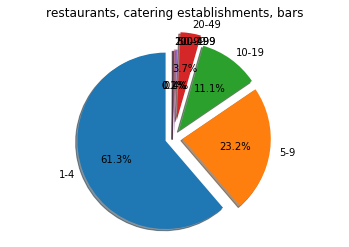

In [159]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['1-4', '5-9', '10-19', '20-49', '50-99', '100-199', '200-499'] 
sizes = dfind_rest['2019_norm']
explode = (0.1, 0.1, 0.1, 0.2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('restaurants, catering establishments, bars')
plt.show()

In [ ]:
dfba = pd.read_excel('./')

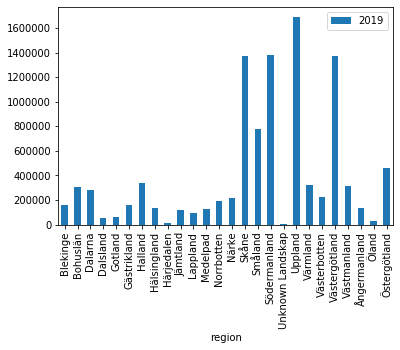

In [105]:
dfpop = pd.read_excel('./000000VK.xlsx', skiprows=2)
dfpop.columns =['region code', 'region', 'sex code','sex', '2019']
dfpop =dfpop.fillna(method ='ffill')
dfpop = dfpop.groupby(['region']).agg({'2019':'sum'}).reset_index()
popplt = dfpop.plot.bar(x = 'region', y = '2019', rot =90)

In [146]:
dfage = pd.read_excel('./git/000003O5.xlsx', skiprows=2).drop(dfage.columns[0], axis =1)
dfage = dfage.fillna(method='ffill')

In [147]:
dfage = dfage.groupby(['region', 'age']).agg({'2020M01': 'sum'}).reset_index()

In [148]:
import re
def get_max_age(s):
    temp = re.findall(r'\d+', s)
    res = max(list(map(int, temp))) 
    return res

In [149]:
dfage['age_max'] = dfage['age'].apply(get_max_age)
dfage.loc[dfage.age_max < 25, 'age_group'] = 1
dfage.loc[(dfage.age_max < 65) & (dfage.age_max > 24), 'age_group'] = 2
dfage.loc[dfage.age_max > 65, 'age_group'] = 3
dfage = dfage.groupby(['region', 'age_group']).agg({'2020M01':'sum'}).reset_index()

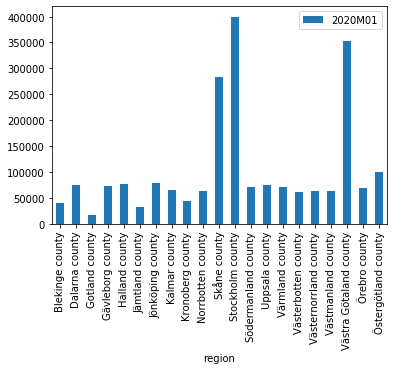

In [150]:
dfage3 = dfage[dfage['age_group'] == 3]#number of people aged 65+
popage3plt = dfage3.plot.bar(x = 'region', y = '2020M01', rot =90)

In [151]:
dfage.region.unique()

array(['Blekinge county', 'Dalarna county', 'Gotland county',
       'Gävleborg county', 'Halland county', 'Jämtland county',
       'Jönköping county', 'Kalmar county', 'Kronoberg county',
       'Norrbotten county', 'Skåne county', 'Stockholm county',
       'Södermanland county', 'Uppsala county', 'Värmland county',
       'Västerbotten county', 'Västernorrland county',
       'Västmanland county', 'Västra Götaland county', 'Örebro county',
       'Östergötland county'], dtype=object)

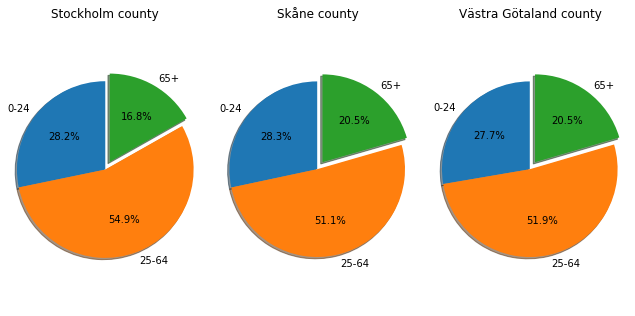

In [158]:
dfage_sthm=dfage[dfage['region']=='Stockholm county']
dfage_skn = dfage[dfage['region']=='Skåne county']
dfage_vgt = dfage[dfage['region']=='Västra Götaland county']
labels = ['0-24', '25-64', '65+'] 
sizes1 = dfage_sthm['2020M01']
sizes2 = dfage_skn['2020M01']
sizes3 = dfage_vgt['2020M01']
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4.5), tight_layout=True)
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Stockholm county')

ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Skåne county')

ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Västra Götaland county')
plt.show()

In [68]:
dfcorona = pd.read_excel('./Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Antal per dag region')
dfcorona

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-02-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
dfcorona_2 = pd.read_excel('./Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Totalt antal per region')

In [73]:
dfcorona_2 = dfcorona_2.fillna(0)

In [88]:
dfcorona_2.columns =['Region', 'Total cases','Cases per 100 K', 'Total intensive', 'Total deaths']

,Region,Total cases,Cases per 100 K,Total intensive,Total deaths
0,Blekinge,27.0,16.916656,2.0,1.0
1,Dalarna,147.0,51.047691,10.0,14.0
2,Gotland,12.0,20.105217,0.0,0.0
3,Gotlands,0.0,0.000000,1.0,0.0
4,Gävleborg,147.0,51.151428,12.0,4.0
5,Halland,114.0,34.147278,10.0,8.0
6,Jämtland Härjedalen,84.0,64.215271,1.0,0.0
7,Jönköping,187.0,51.430283,15.0,13.0
8,Kalmar,46.0,18.741394,2.0,1.0
9,Kronoberg,45.0,22.335943,0.0,0.0


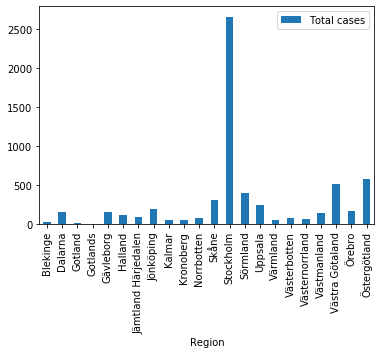

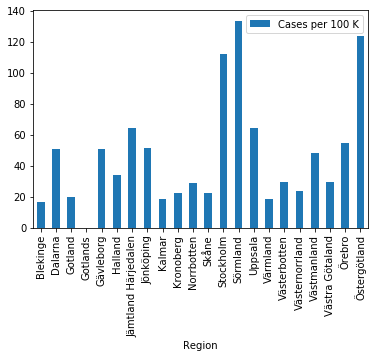

In [161]:
corona_plot = dfcorona_2.plot.bar(x = 'Region', y = 'Total cases', rot =90)
corona_plot2 = dfcorona_2.plot.bar(x = 'Region', y = 'Cases per 100 K', rot = 90)